<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%5B9%5D%ED%85%8D%EC%8A%A4%ED%8A%B8_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#연습데이터 불러오기
IMDB의 영화 리뷰 데이터입니다. 이 데이터는 25000개 리뷰에 대한 텍스트(X)와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블(y)로 구성되어 있습니다. 케라스에서는 해당 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 바로 다운로드 할 수 있도록 지원하고 있습니다. 케라스로부터 해당 데이터를 다운로드 받아 감성 분류를 수행하는 모델을 만들어보겠습니다.

---

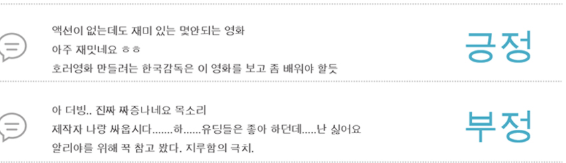


In [1]:
## 필요한 라이브러리 부르기
from keras.datasets import imdb; import numpy as np; from keras import models, layers; import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; from matplotlib import style; import pandas as pd
!git clone https://github.com/hongjai-rhee/public.git

Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 438 (delta 33), reused 35 (delta 10), pack-reused 353
Receiving objects: 100% (438/438), 28.64 MiB | 11.24 MiB/s, done.
Resolving deltas: 100% (211/211), done.


# 텍스트 형태의 영화리뷰를 살펴보자

In [7]:
train = pd.read_csv('/content/public/imdb25000_processed.csv')
review=train['review']
print(review[0])
print(review[10])

with all this stuff going down at the moment with mj i ve started listening to his music watching the odd documentary here and there watched the wiz and watched moonwalker again maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent moonwalker is part biography part feature film which i remember going to see at the cinema when it was originally released some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for minutes or so

# WordCloud로 시각화해보자

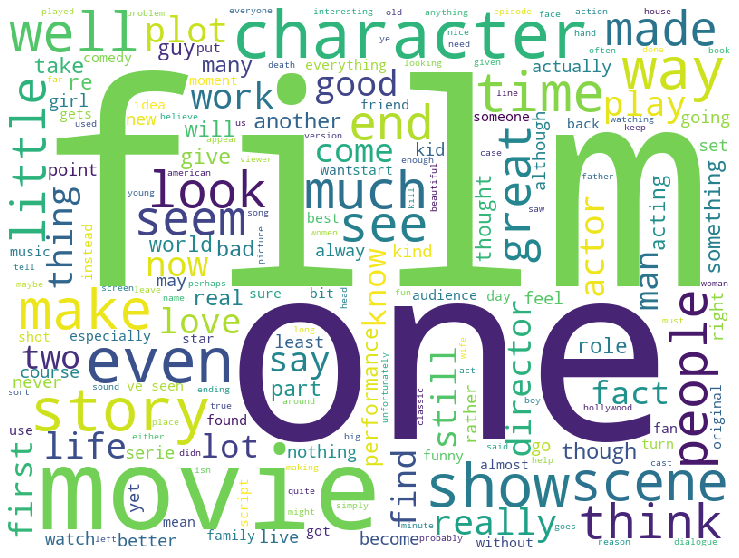

CPU times: user 24 s, sys: 1.47 s, total: 25.5 s
Wall time: 25.5 s


In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# 데이터의 모든 리뷰에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(train['review']))

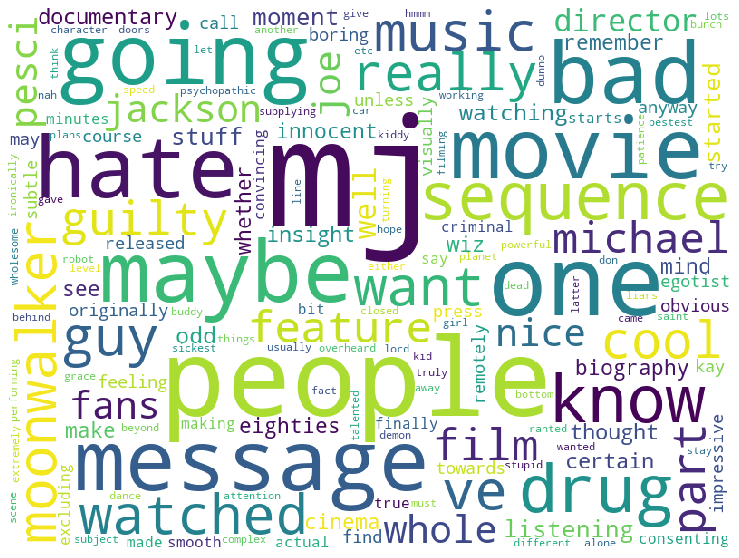

In [13]:
## 첫번째 리뷰에 대한 워드 클라우드
displayWordCloud(' '.join(review[0:1]))
## 긍정적일까 부정적일까?

# 이제 숫자로 변환된 리뷰 데이터를 사용하여 분석합니다

In [16]:
K=10000   ## 영화 리뷰에 자주 나오는 K개의 단어만 사용하기
## IMDB 데이터 불러오기
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=K)  # 25000 train, 25000 test
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


# 이제 단어와 숫자가 one to one 매핑되어 있는 사전을 불러오겠습니다. 

In [17]:

## 사전 읽어오기 (빈도순 정렬) 
word2num = imdb.get_word_index()
num2word = dict([(value, key) for (key, value) in word2num.items()])  # 숫자를 단어로 
num2word[256]
num2word = dict([(value, key) for (key, value) in word2num.items()])  # 단어를 숫자로

for i in range(1,30,1) :  print(i,num2word[i], end='  ')   ## 빈도순으로 단어 출력

1646592/1641221 [==============================] - 1s 1us/step
1 the  2 and  3 a  4 of  5 to  6 is  7 br  8 in  9 it  10 i  11 this  12 that  13 was  14 as  15 for  16 with  17 movie  18 but  19 film  20 on  21 not  22 you  23 are  24 his  25 have  26 he  27 be  28 one  29 all  

# 리뷰 테스트의 각 단어는 dictionary의 정수값으로 매핑 되어 있습니다. 
num2word를 사용하여 다시 텍스트로 표현할 수도 있습니다. 


In [18]:
print(train_data[0])
ex=train_data[0]
for i in range(1,25,1) :  print(num2word[ex[i]-3], end=' ')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
this film was just brilliant casting location scenery story 

# 리뷰 정수벡터를 1만개의 단어에 대한 Bag of Words 코드로 만들고 (단어의 위치에 1) 
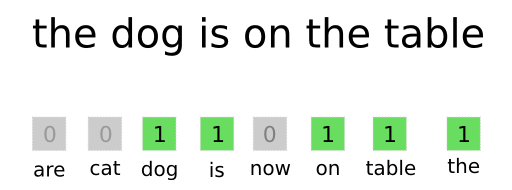
# 레이블 y도 one-hot 핫코드로 변환합니다(긍정이면 (1,0).  부정이면 (0,1))
 


In [20]:
## 원핫코드 만들기 
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듭니다.
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환합니다.
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(x_train[33,0:20])                # 센턴스에 있는 단어는 1, 없는 단어는 0.. 빈도는 고려하지 않음 

y_test1=1-y_test
yy_test=np.transpose(np.vstack([y_test, y_test1]))
y_train1=1-y_train
yy_train=np.transpose(np.vstack([y_train, y_train1]))

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.]


# 분류 모형을 만들어 실행시킵니다.
가장 간단한 단층 Dense모형을 사용해보겠습니다. 
 


In [21]:

EPOCH=10
BATCH=512

#모형 만들기
model = models.Sequential()
#model.add(layers.Dense(10, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, input_shape=(10000,), activation='softmax'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]; partial_x_train = x_train[10000:]; y_val = yy_train[:10000]; partial_y_train = yy_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=EPOCH, batch_size=BATCH, validation_data=(x_val, y_val))

history_dict = history.history; loss = history_dict['loss']; acc = history_dict['acc']; val_acc = history_dict['val_acc']







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 15000 samples, validate on 10000 samples
Epoch 1/10





15000/15000 [==============================] - 2s 135us/step - loss: 0.5626 - acc: 0.7729 - val_loss: 0.4876 - val_acc: 0.8372
Epoch 2/10
15000/15000 [==============================] - 1s 96us/step - loss: 0.4299 - acc: 0.8720 - val_loss: 0.4163 - val_acc: 0.8598
Epoch 3/10
15000/15000 [==============================] - 1s 97us/step - loss: 0.3618 - acc: 0.8964 - val_loss: 0.3715 - val_acc: 0.8736
Epoch 4/10
15000/15000 [==============================] - 1s 96us/step - loss: 0.3168 - acc: 0.9067 - val_loss: 0.3437 - val_acc: 0.8781
Epoch 5/10
15000/15000 [==============================] - 1s 95us/step - loss: 0.2838 - acc: 0.9167 - val_loss: 0.3241 - val_acc: 0.8838
Epoch 6/10
15000/15000 [==============================] - 1s 97us/step - loss: 0.2587 - acc: 0.9247 - val_loss: 0.3105 - val_acc: 0.8854
Epoch 7/10
15000/150

# 학습모형의 테스트셋에 대한 예측 정확도를 그림으로 표시해봅시다. 

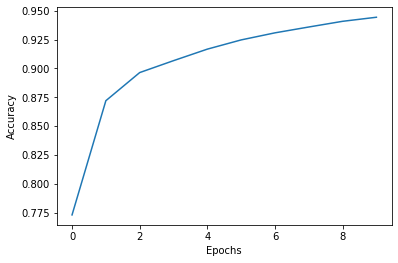

In [22]:
epoch=range(0,EPOCH,1)
plt.plot(epoch, acc, label='Accuracy (%)')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.show()



# 테스트 셋에 있는 15개 리뷰의 예측결과를 살펴봅시다. 

In [44]:
## 7. 예측결과 시각화  
pt=model.predict(x_test)

ratio = pt[1]; 
print(' 부정확률 긍정확률')
for i in range(15):
  print(i,np.round(pt[i],3))


 부정확률 긍정확률
0 [0.384 0.616]
1 [0.997 0.003]
2 [0.914 0.086]
3 [0.721 0.279]
4 [0.882 0.118]
5 [0.778 0.222]
6 [0.992 0.008]
7 [0.088 0.912]
8 [0.921 0.079]
9 [0.961 0.039]
10 [0.821 0.179]
11 [0.043 0.957]
12 [0.014 0.986]
13 [0.037 0.963]
14 [0.996 0.004]


# 어떤 댓글이길래??

In [50]:
ex=test_data[1]
for i in range(1,27,1) :  print(num2word[ex[i]-3], end=' ')

this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take 